In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

In [4]:
#load the data, examine and explore
datafile = r"C:\Users\user\Downloads\Feature_Engineering\data\Ames_Housing_Data.tsv"
df = pd.read_csv(datafile, sep = '\t')

In [5]:
df.info()

#looking at missing data to determine missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

<Axes: >

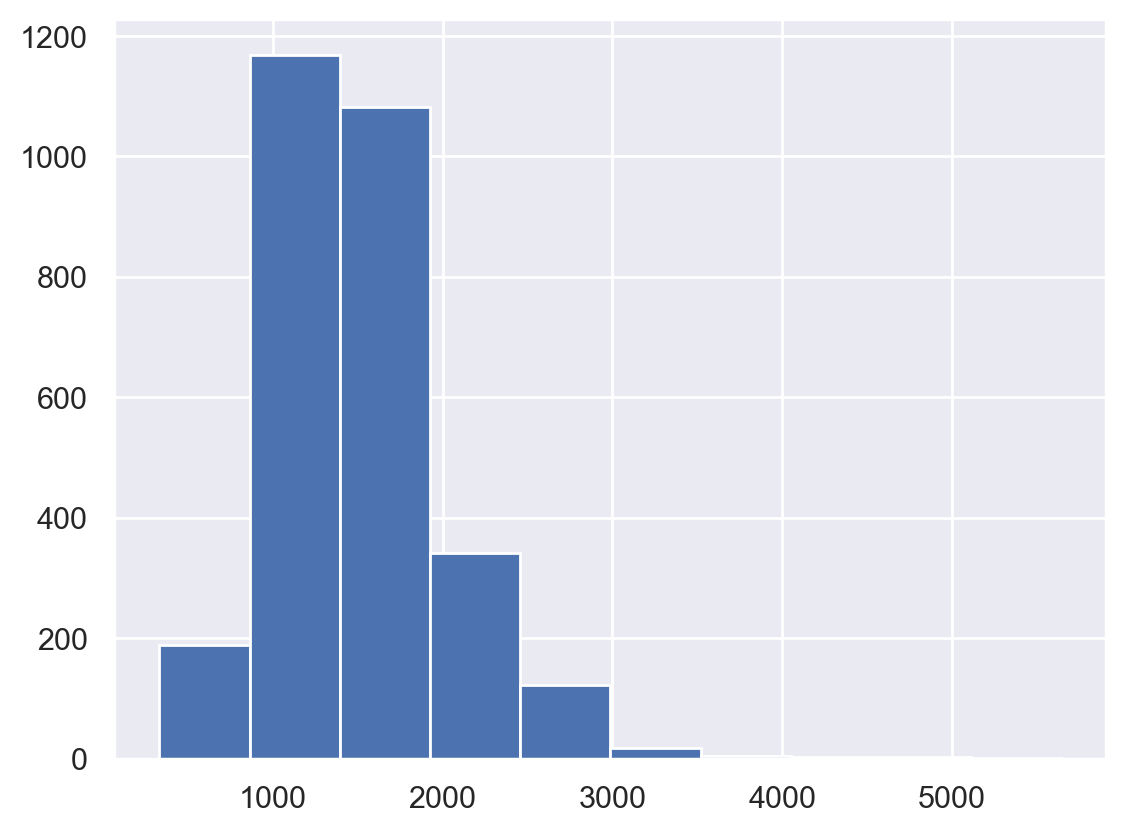

In [6]:
df['Gr Liv Area'].hist()

In [7]:
#recommended by the dataset author, to remove outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:] #outliers lie beyond 4000
print('Number of rows in the data:', df.shape[0])
print('Number of columns in the data:', df.shape[1])
data = df.copy() #to keep copy of original data

Number of rows in the data: 2925
Number of columns in the data: 82


In [8]:
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [9]:
len(df.PID.unique())

2925

In [10]:
#drop columns for which every value is unique
df.drop(['PID', 'Order'], axis=1, inplace= True)

In [ ]:

LOG TRANSFORMING SKEW VARIABLES



In [13]:
df.select_dtypes('number').columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [18]:
#Create a list of float columns to check for skewing

num_cols = df.select_dtypes('number').columns
skew_vals = df[num_cols].skew()

skew_limit = 0.75 #defines a limit above which we will then log transform
skewed_cols = skew_vals[abs(skew_vals) > skew_limit].index
skewed_cols
#showing skewed columns


Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Half Bath',
       'Kitchen AbvGr', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

In [19]:
skew_vals

MS SubClass         1.356549
Lot Frontage        1.111071
Lot Area           13.200004
Overall Qual        0.171657
Overall Cond        0.572769
Year Built         -0.602475
Year Remod/Add     -0.449567
Mas Vnr Area        2.565458
BsmtFin SF 1        0.821985
BsmtFin SF 2        4.135900
Bsmt Unf SF         0.925021
Total Bsmt SF       0.399079
1st Flr SF          0.942615
2nd Flr SF          0.847517
Low Qual Fin SF    12.107629
Gr Liv Area         0.878879
Bsmt Full Bath      0.615553
Bsmt Half Bath      3.965970
Full Bath           0.164954
Half Bath           0.702966
Bedroom AbvGr       0.306912
Kitchen AbvGr       4.309573
TotRms AbvGrd       0.704992
Fireplaces          0.732312
Garage Yr Blt      -0.382039
Garage Cars        -0.219734
Garage Area         0.213681
Wood Deck SF        1.848286
Open Porch SF       2.495162
Enclosed Porch      4.010586
3Ssn Porch         11.393854
Screen Porch        3.953495
Pool Area          18.743766
Misc Val           22.225015
Mo Sold       

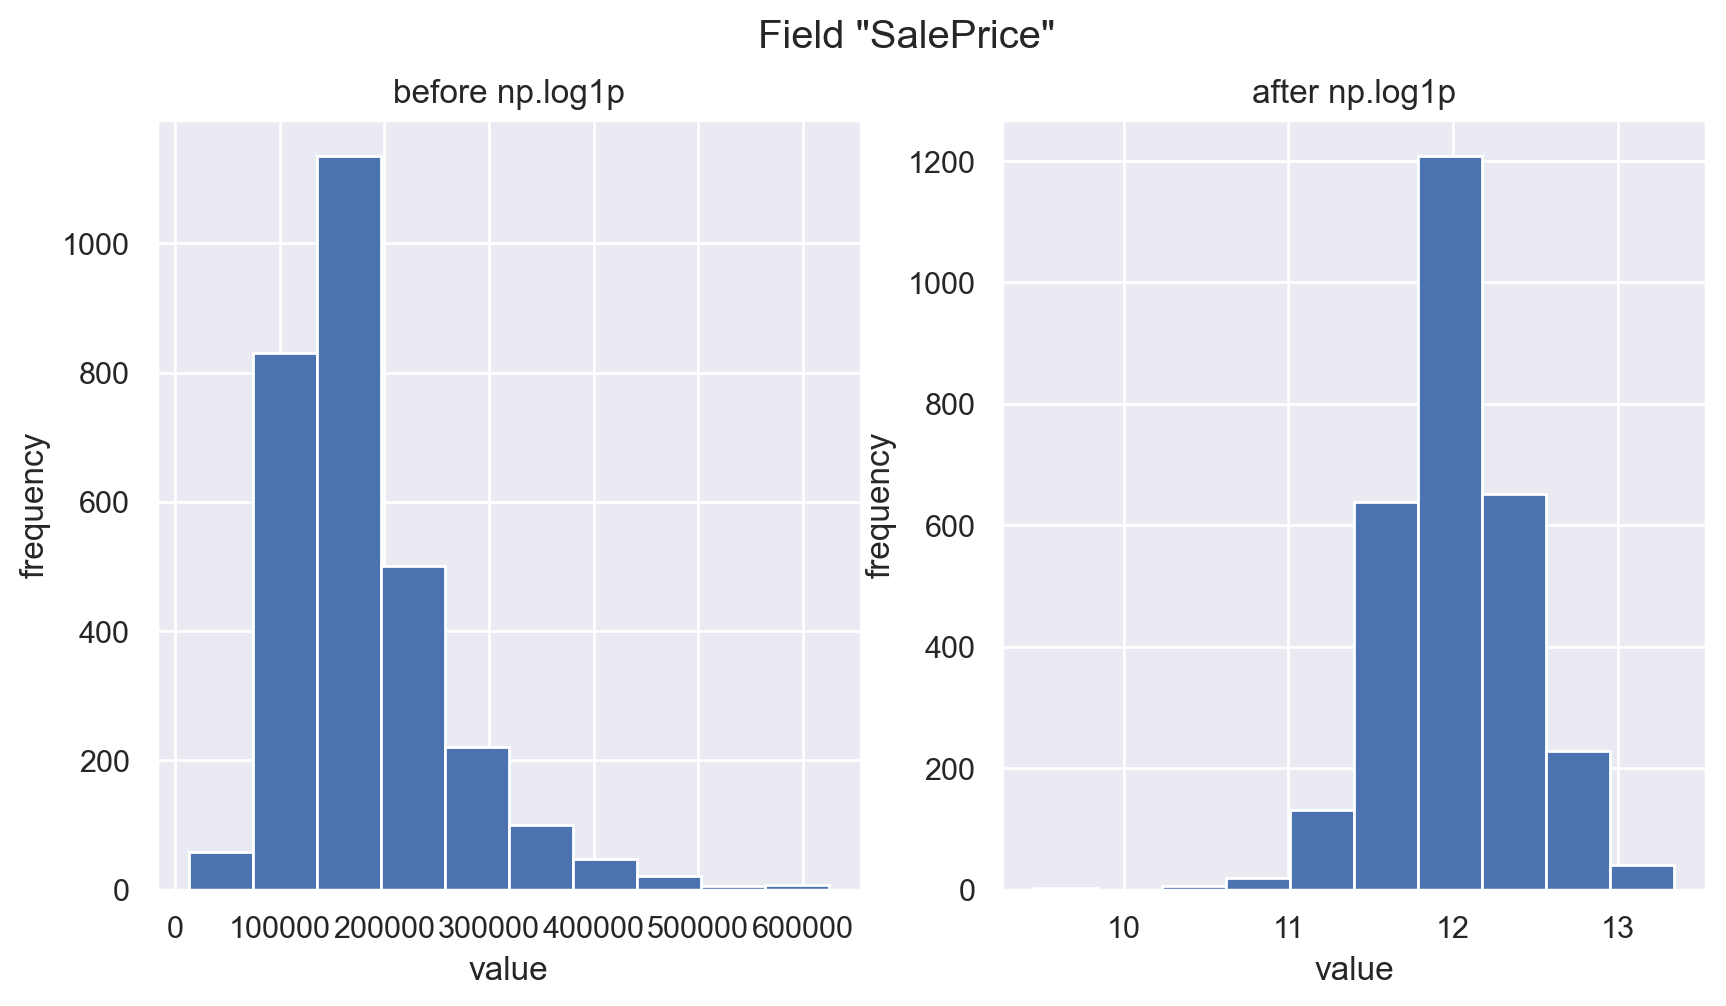

In [21]:
#when we apply np.log1p
#choose a fied
field = 'SalePrice'
#create two subplots and a digure using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize = (10,5))

#create  a histogram on the 'ax_before' plot
df[field].hist(ax = ax_before)

#apply a lof transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax = ax_after)

#formatting of titles for each subplot
ax_before.set(title = 'before np.log1p', ylabel = 'frequency', xlabel = 'value')
ax_after.set(title = 'after np.log1p', ylabel = 'frequency', xlabel = 'value')
fig.suptitle('Field "{}"'.format(field));


In [23]:
#perform the skew transformation

for col in skewed_cols:
    if col == "SalesPrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [24]:
#check how many values miising from the original dataset

data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Mas Vnr Type      1774
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

In [27]:
smaller_df = df.loc[:,['Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add','Gr Liv Area',
       'Full Bath','Bedroom AbvGr','Fireplaces',
       'Garage Cars','SalePrice']]

In [29]:
smaller_df.describe().T #transposes our data set

count         mean        std          min          25%  \
Lot Area        2925.0     9.090148   0.508309     7.170888     8.914492   
Overall Qual    2925.0     6.088205   1.402953     1.000000     5.000000   
Overall Cond    2925.0     5.563761   1.112262     1.000000     5.000000   
Year Built      2925.0  1971.302906  30.242474  1872.000000  1954.000000   
Year Remod/Add  2925.0  1984.234188  20.861774  1950.000000  1965.000000   
Gr Liv Area     2925.0     7.258784   0.320753     5.814131     7.027315   
Full Bath       2925.0     1.564786   0.551386     0.000000     1.000000   
Bedroom AbvGr   2925.0     2.853675   0.827737     0.000000     2.000000   
Fireplaces      2925.0     0.596923   0.645349     0.000000     0.000000   
Garage Cars     2924.0     1.765048   0.759834     0.000000     1.000000   
SalePrice       2925.0    12.019887   0.406013     9.456419    11.771444   

                        50%          75%          max  
Lot Area           9.151545     9.351493    12.279537  
Overall Qual       6.000000     7.000000    10.000000  
Overall Cond       5.000000     6.000000     9.000000  
Year Built      1973.000000  2001.000000  2010.000000  
Year Remod/Add  1993.000000  2004.000000  2010.000000  
Gr Liv Area        7.273786     7.462215     8.248267  
Full Bath          2.000000     2.000000     4.000000  
Bedroom AbvGr      3.000000     3.000000     8.000000  
Fireplaces         1.000000     1.000000     4.000000  
Garage Cars        2.000000     2.000000     5.000000  
SalePrice         11.982935    12.271397    13.345509

In [30]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 274.2 KB


In [33]:
smaller_df = smaller_df.fillna(0)
smaller_df.info()
#fills the 'garage cars' single null value found

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 274.2 KB


In [ ]:
PAIR PLOT OF FEATURES : TO UNDERSTAND THE TARGET AND FEATURE-TARGET R/SHIP

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


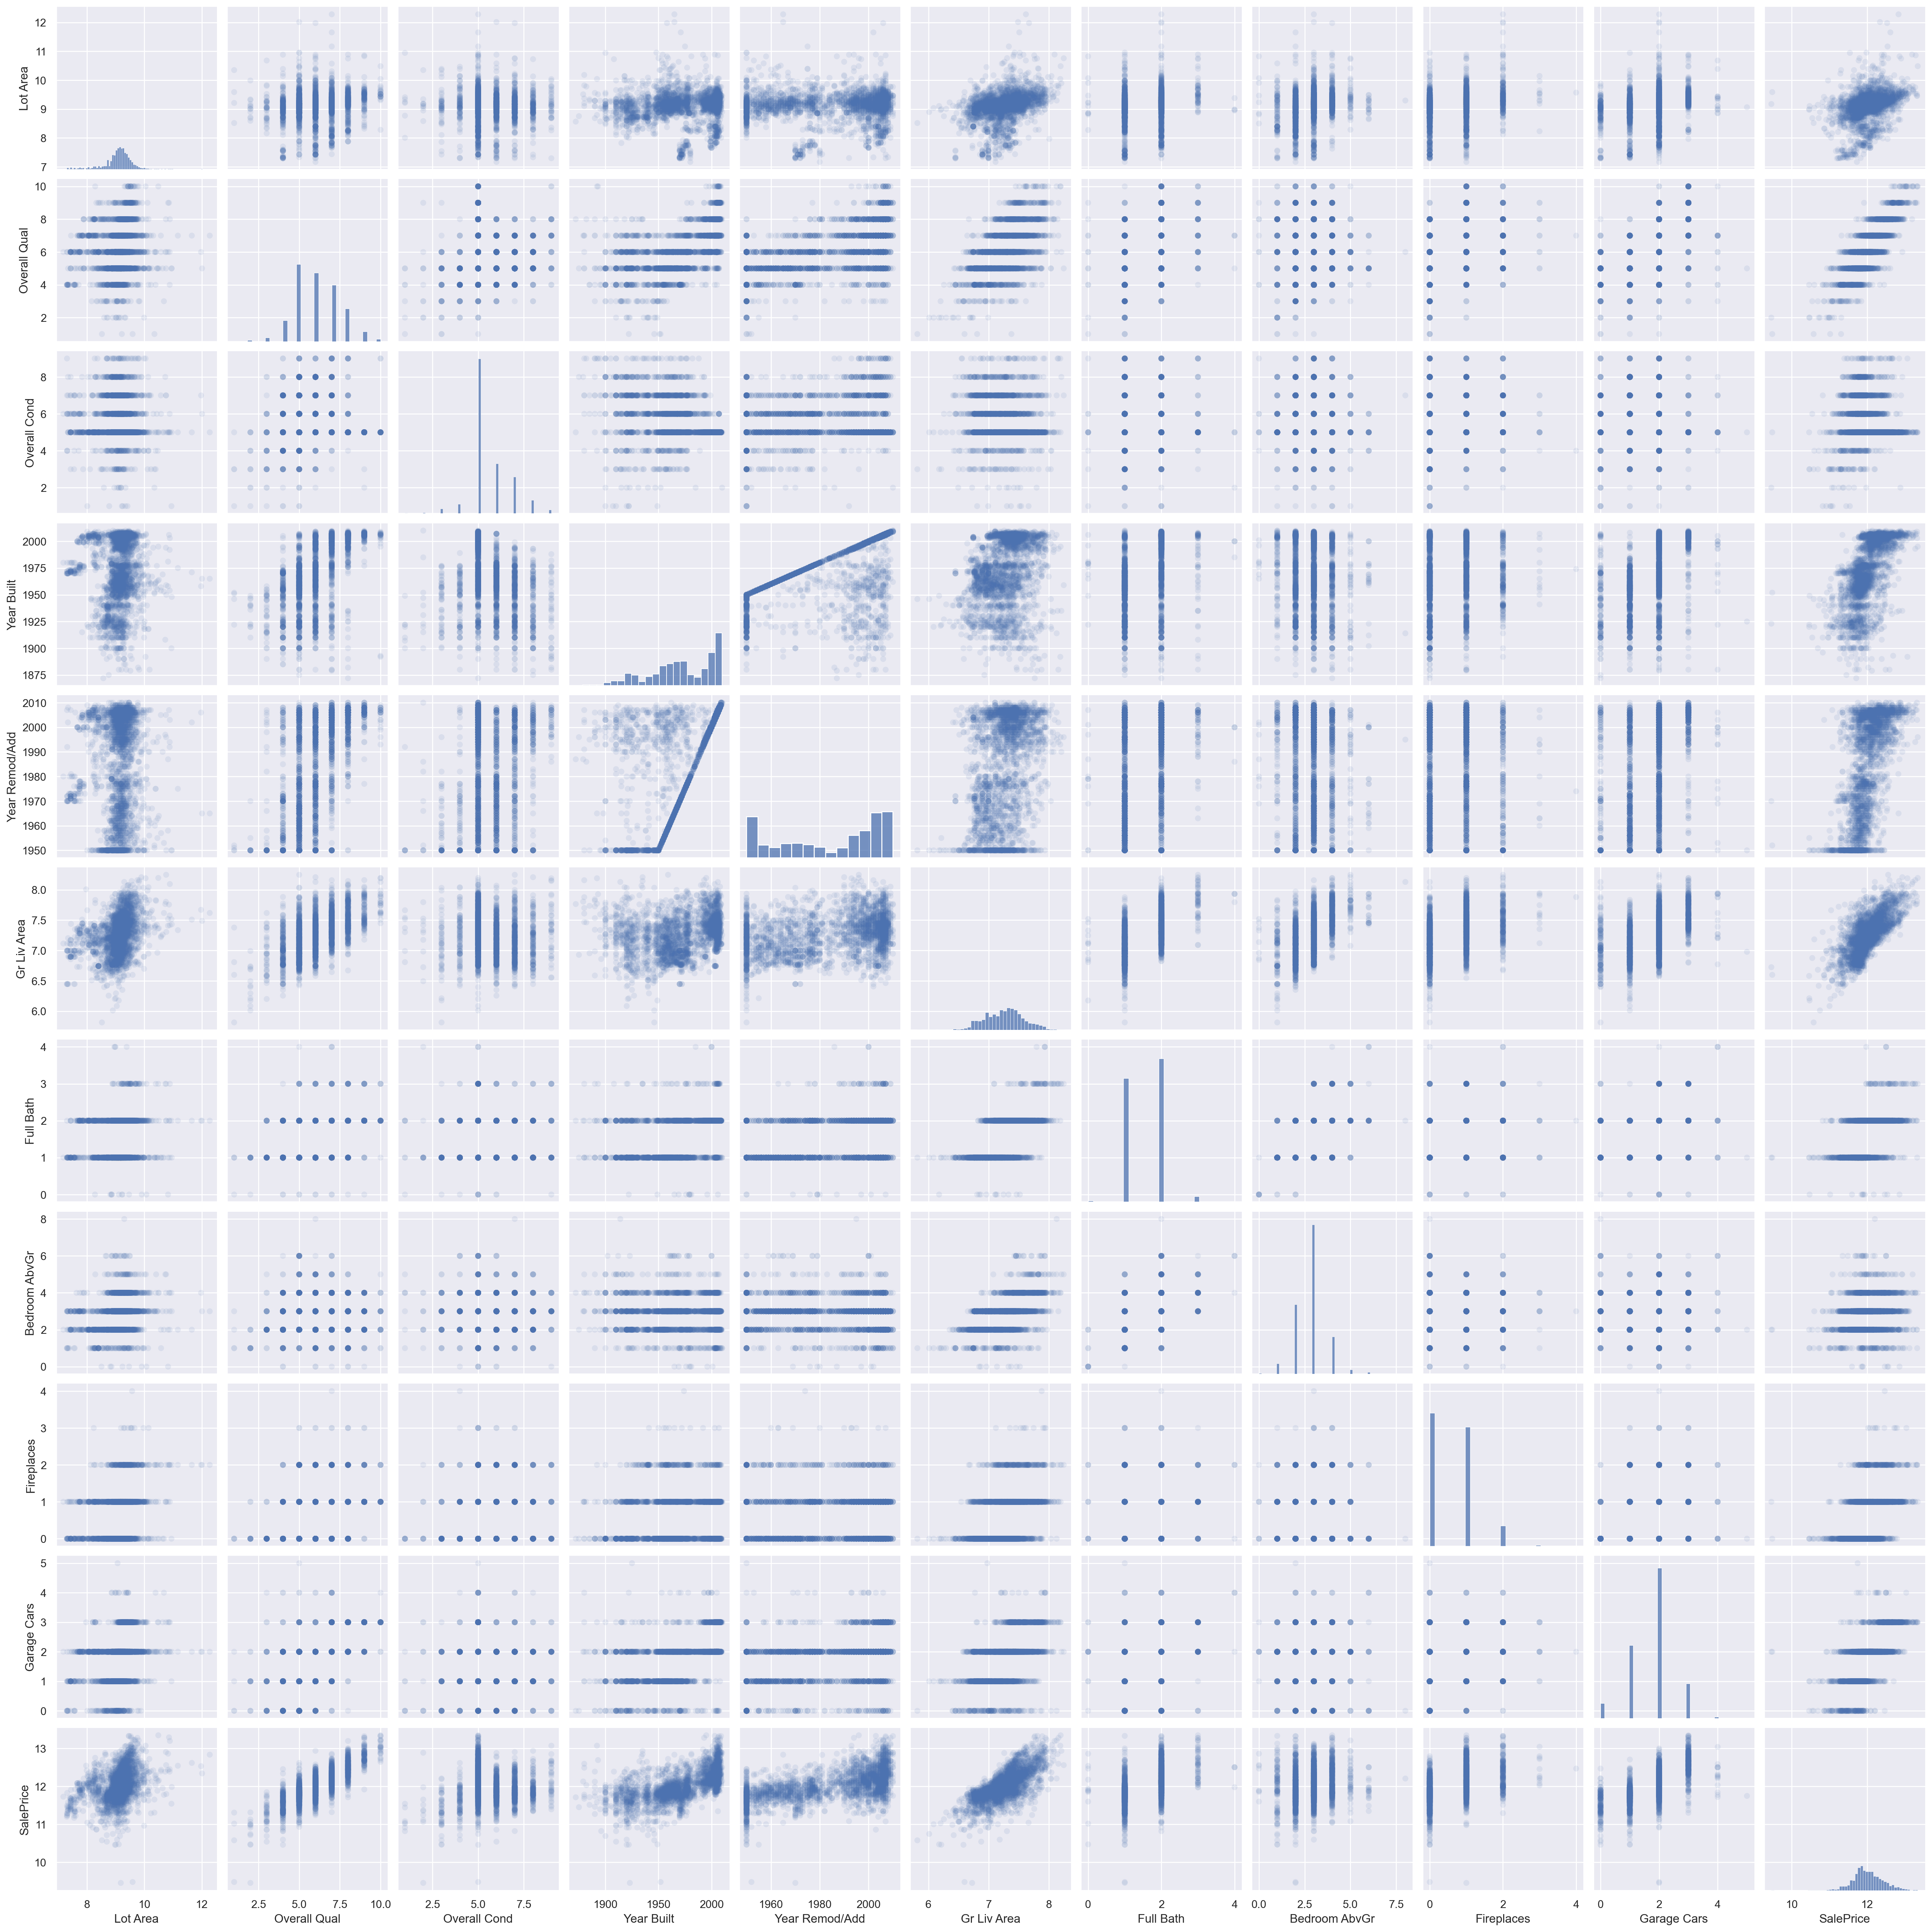

In [34]:
sns.pairplot(smaller_df, plot_kws = dict(alpha =.1, edgecolor = 'none'))

In [35]:
#Q: suppose saleprice was the target variable, setup separate variable for features and target

x= smaller_df.loc[:,['Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add','Gr Liv Area',
       'Full Bath','Bedroom AbvGr','Fireplaces',
       'Garage Cars']]

y = smaller_df['SalePrice']

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 251.4 KB


In [37]:
#POLYNOMIAL FEATURES

X2 = x.copy()

X2['OQ2'] = X2['Overall Qual']**2

X2['GLA2'] = X2['Gr Liv Area']**2



In [40]:
#FEATURE INTERACTIONS
#MULTIPLYING OVERALL QUAL BY YEAR BUILT TO SEE IF THERE IS A HIGHER PREMIUM FOR INCREASING OQ FOR HOUSES BUILT RECENTLY
#TO GET AT QUALITY PER SQ FOOT WE DIVIDE OQ BY LOT AREA

X3 = X2.copy()
# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']

In [ ]:


CATEGORIES AND FEATURES FROM CATEGORY AGGS.
-Incorporate categorical features into linear regression using one-hot encoding(dummy variables)
(create a new feautre column and fill them with 1s and 0s to indicate which category is present for each row)



In [41]:
df['House Style'].value_counts()

House Style
1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [43]:
#using pandas get_dummies() method:
pd.get_dummies(df['House Style'], drop_first =True).head()

1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer   SLvl
0   False    True   False   False   False   False  False
1   False    True   False   False   False   False  False
2   False    True   False   False   False   False  False
3   False    True   False   False   False   False  False
4   False   False   False   False    True   False  False

In [44]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts
#mapping the leat-represented neighborhoods to another category ('other') before adding the feature to the feature set and running a new benchmark

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [45]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [46]:
X4 = X3.copy()

#transform the original x4 neighbourhood

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')

In [47]:
X4.Neighborhood.value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Other       11
Blueste     10
Name: count, dtype: int64